# 경제지표
- description: 알아야 산다
- layout: post
- categories: [경제]
- toc: true

전체 코드는 [GitHub](https://github.com/everlearningemployee/blog/blob/master/_notebooks/2020-08-19-Economic_indicators.ipynb) 참고 바랍니다

In [1]:
#hide
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams["font.family"] = 'gulim'
plt.rcParams["figure.figsize"] = (15,5)

# 구매

## 미국 ISM 제조업 구매관리자 지수 (PMI) 
- ISM이란: '구매부장님협회' 쯤 ([구글검색](https://www.google.com/search?newwindow=1&sxsrf=ALeKk03yyI9WKgi0etx-fs_1dvTKtMswrA%3A1597932188575&ei=nII-X6PbIreTr7wPsa-9wAg&q=ism+%EC%A0%9C%EC%A1%B0%EC%97%85+%EA%B5%AC%EB%A7%A4%EA%B4%80%EB%A6%AC%EC%9E%90+%EC%A7%80%EC%88%98&oq=ism&gs_lcp=CgZwc3ktYWIQAxgBMgQIIxAnMgQIIxAnMgYIIxAnEBMyAggAMgQIABBDMgIIADICCAAyAggAMgcIABAUEIcCMggIABCxAxCDAToECAAQRzoFCAAQywFQqq0BWNe5AWC3ywFoAXABeACAAYQBiAG5ApIBAzIuMZgBAKABAaoBB2d3cy13aXrAAQE&sclient=psy-ab))
- +: 경기확장 / -: 경기위축 
- 기준: 50        
- https://youtu.be/w3DHeB62cfA 

In [2]:
#hide
import quandl
quandl.ApiConfig.api_key = "g__NU8_KS5-db8Z8sWLs"

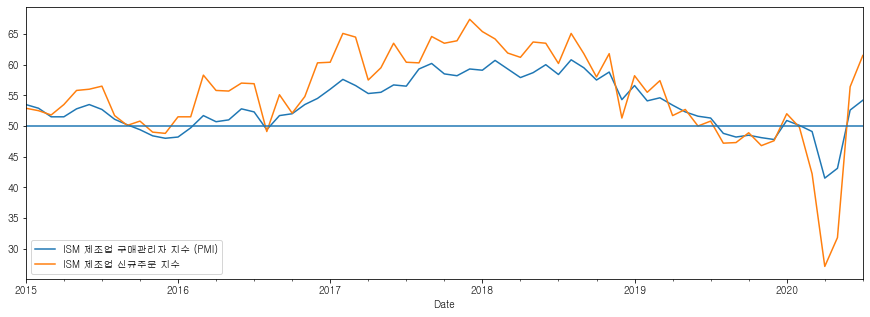

In [3]:
indx = [
    ('ISM/MAN_PMI'      , 'PMI'  , 'ISM 제조업 구매관리자 지수 (PMI)'), 
    ('ISM/MAN_NEWORDERS', 'Index', 'ISM 제조업 신규주문 지수'        ), 
    #('ISM/NONMAN_NMI'   , 'Index', 'ISM 서비스업 구매관리자 지수'    ), 
]

for indxCd, colNm, labelNm in indx:
    d = quandl.get(indxCd, start_date = '2015-01-01')
    s = d[colNm]
    p = s.plot(label = labelNm)    

p.axhline(50) # PMI는 50이 기준
tmp = p.legend(loc='lower left')

- 데이터/API 출처: https://www.quandl.com/data/ISM/MAN_PMI-PMI-Composite-Index / https://www.quandl.com/tools/python

## 중국 차이신 제조업 구매관리자 지수
- HSBC가 작성하는 중국 제조업 구매관리자지수
- https://kr.investing.com/economic-calendar/chinese-caixin-manufacturing-pmi-753

In [4]:
#hide
import requests, json
import pandas as pd

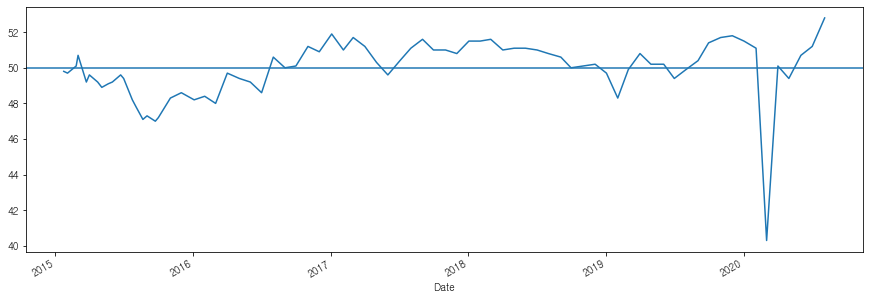

In [5]:
url = 'https://sbcharts.investing.com/events_charts/us/753.json'
hdr = {'User-Agent': 'Mozilla/5.0'}
resp = requests.get(url, headers=hdr)
json_data = json.loads(resp.text)

df = pd.DataFrame(json_data['attr']).rename(columns={'timestamp':'Date'}).set_index('Date')
df.index = pd.to_datetime(df.index*1000000)
p = df['actual']['2015':].plot()
tmp = p.axhline(50) # PMI는 50이 기준

# 원자재

### 원유

#### WTI유 선물: 
- https://kr.investing.com/commodities/crude-oil

#### WTI유 현물: 
- https://kr.investing.com/currencies/wti-usd

In [6]:
#hide
hdr_wti = {
    'User-Agent': 'Mozilla/5.0',
    'X-Requested-With': 'XMLHttpRequest',
    'Referer': 'https://www.investing.com',
}
iterval = {
    '1-day'   : 300    , 
    '1-week'  : 1800   ,
    '1-month' : 3600   ,
    '3-months': 18000  ,
    '6-months': 18000  ,
    '1-year'  : 86400  ,
    '5-years' : 'month',
    'max'     : 'month',
}
prm_wti = {
    'pair_id': 8831,
    #'pair_id_for_news': 8831,
    'chart_type': 'area',
    'pair_interval': 86400,
    'candle_count': 120,
    #'events': 'yes',
    #'volume_series': 'yes',
    'period': '1-year',
}

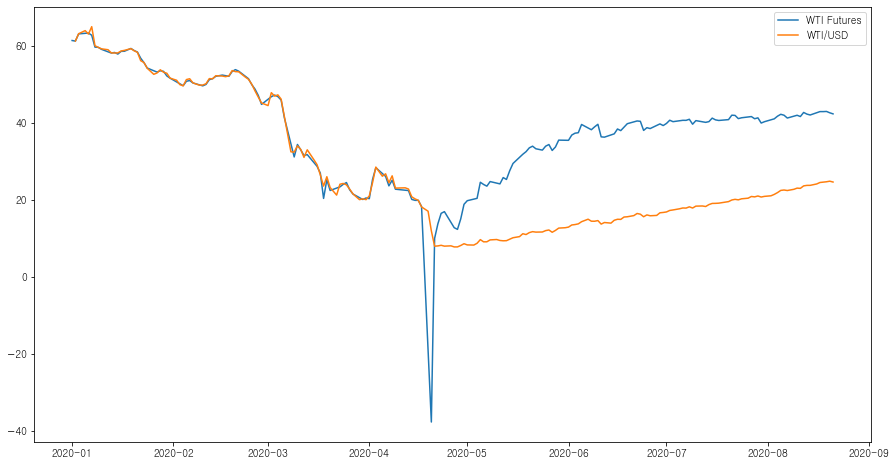

In [7]:
url = 'https://www.investing.com/common/modules/js_instrument_chart/api/data.php'
period = '1-year'
prm_wti['period'] = period
prm_wti['pair_interval'] = iterval[period]
indx_wti = [
    (8849   , 'WTI Futures'), # Crude Oil WTI Futures
    (1043109, 'WTI/USD'    ), # WTI/USD - Crude Oil WTI Spot US Dollar
    #(8831,    'Copper Futures'), # 구리 선물
]

plt.figure(figsize=(15, 8))
for cd, lbl in indx_wti:
    prm_wti['pair_id'] = cd
    resp = requests.get(url, headers=hdr_wti, params=prm_wti)
    json_data = json.loads(resp.text)

    df = pd.DataFrame(json_data['candles'], columns=['Date', lbl]).set_index('Date')
    df.index = pd.to_datetime(df.index*1000000)
    plt.plot(df['2020-01-01':], label=lbl)
tmp = plt.legend()    

### 구리 선물
- 왜 중요한가: [구리 박사 vs 코코아 선생, 경기를 보는 두 지표 - 매일경제](https://www.mk.co.kr/opinion/contributors/view/2020/07/782882/)
- [런던금속거래소(London Metal Exchange) LME Copper](https://www.lme.com/Metals/Non-ferrous/Copper#tabIndex=2)
- https://markets.businessinsider.com/commodities/copper-price
- LME 데이터는 무료를 못 찾았으니까 아쉬운대로 COMEX (근데 COMEX 맞음?)
  - https://github.com/FinanceData/FinanceDataReader
    - https://www.investing.com 데이터

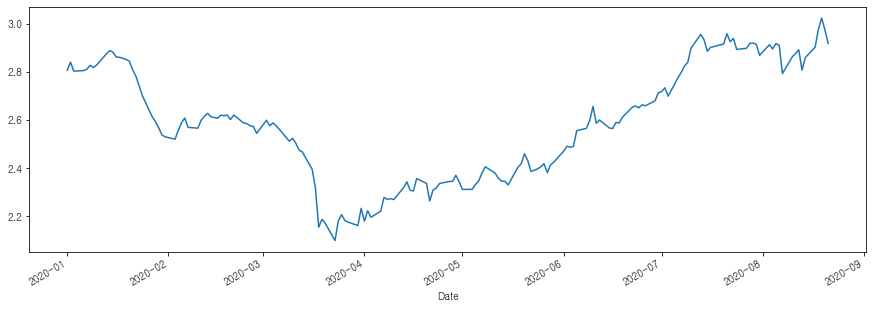

In [8]:
import FinanceDataReader as fdr
df = fdr.DataReader('HG', '2020')
tmp = df['Close'].plot()

# 소비재

### 인터콘티넨탈 거래소 코코아 선물 (ICE Cocoa Future)
- 불황에는 사람들이 코코아를 덜 먹는다고 함
- https://www.theice.com/products/7/Cocoa-Futures/data?marketId=5867687&span=2

In [9]:
#hide
import requests, json
import pandas as pd

In [10]:
#hide
prm_ice = {
    'marketId': 5867687, # Cocoa Future
    'historicalSpan': 2, # 최근 1년
    'getHistoricalChartDataAsJson': '',
} 

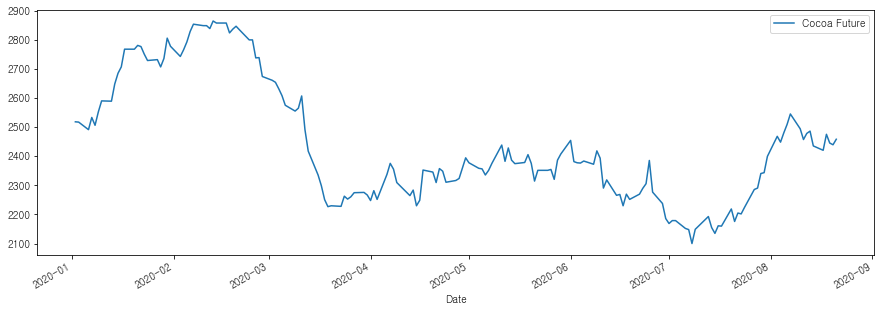

In [11]:
url_ice = 'https://www.theice.com/marketdata/DelayedMarkets.shtml' 
resp = requests.get(url_ice, params=prm_ice)
json_data = json.loads(resp.text)
bars = json_data['bars']    

df = pd.DataFrame(bars, columns = ['Date', 'Cocoa Future']).set_index('Date')   
df.index = pd.to_datetime(df.index)
tmp = df['2020-01-01':].plot()

# 고용지표

### 미국 신규실업수당 청구건수 (Initial Jobless Claims, ICSA)
- https://fred.stlouisfed.org/graph/?g=uvUG

### 미국 실업률
- https://fred.stlouisfed.org/graph/?g=uw4u

In [12]:
#hide
import requests, json
import pandas as pd
from io import StringIO

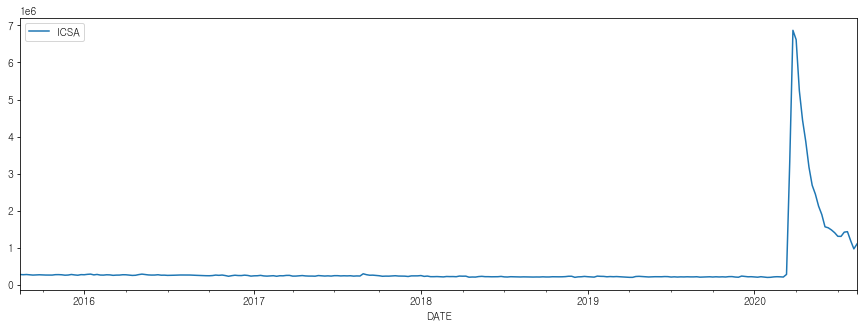

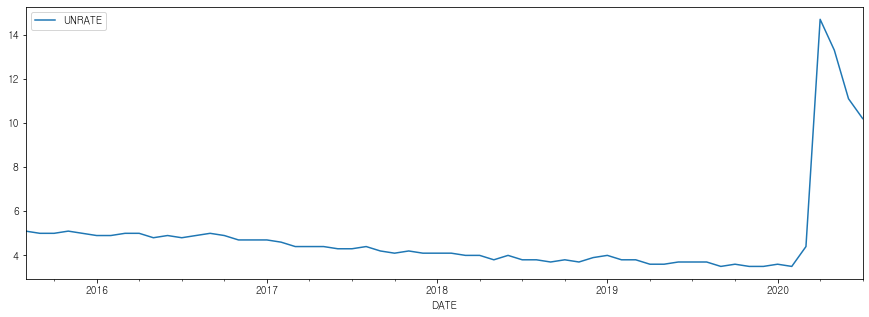

In [13]:
indx_fed = [
    ('ICSA'  , '미국 신규실업수당 청구건수'), 
    ('UNRATE', '미국 실업률'               ), 
]
url_fed = 'https://fred.stlouisfed.org/graph/fredgraph.csv'
for id, labelNm in indx_fed:
    prm = {
            'id': id,
            'cosd': '2015-08-15', # from dt
            #'coed': '2020-08-15', # to dt
        }
    resp = requests.get(url_fed, params=prm)
    csv = StringIO(resp.text)
    df = pd.read_csv(csv).set_index('DATE')
    df.index = pd.to_datetime(df.index)
    df.plot(label = labelNm) 